**Machine Learning House Prices**

Base de dados: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot
Aula: https://www.youtube.com/watch?v=N0wi3f9PCqg

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

base = pd.read_csv("melb_data.csv")

In [ ]:
base.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,"1,480,000.00",S,Biggin,3/12/2016,2.50,"3,067.00",...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000.00",S,Biggin,4/02/2016,2.50,"3,067.00",...,1.00,0.00,156.00,79.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
2,Abbotsford,5 Charles St,3,h,"1,465,000.00",SP,Biggin,4/03/2017,2.50,"3,067.00",...,2.00,0.00,134.00,150.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
3,Abbotsford,40 Federation La,3,h,"850,000.00",PI,Biggin,4/03/2017,2.50,"3,067.00",...,2.00,1.00,94.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
4,Abbotsford,55a Park St,4,h,"1,600,000.00",VB,Nelson,4/06/2016,2.50,"3,067.00",...,1.00,2.00,120.00,142.00,"2,014.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"


In [ ]:
profile = ProfileReport(base)
profile

# Tratando a base de dados para usar no modelo

In [5]:
# Retirando as colunas que tiverem uma alta cardinalidade
base = base.drop(["Suburb", "Address", "SellerG", "Date"], axis=1)

In [6]:
# Retirando as colunas com mais de 20% dos valores nulos
base = base.drop(["BuildingArea", "YearBuilt"], axis=1)

In [7]:
# Visualizando a base após o tratamento
base.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,"1,480,000.00",S,2.50,"3,067.00",2.00,1.00,1.00,202.00,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,2,h,"1,035,000.00",S,2.50,"3,067.00",2.00,1.00,0.00,156.00,Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
2,3,h,"1,465,000.00",SP,2.50,"3,067.00",3.00,2.00,0.00,134.00,Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
3,3,h,"850,000.00",PI,2.50,"3,067.00",3.00,2.00,1.00,94.00,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
4,4,h,"1,600,000.00",VB,2.50,"3,067.00",3.00,1.00,2.00,120.00,Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"


In [8]:
# Visualizando a correlação entre as variáveis
plt.figure(figsize=(13,8))
sns.heatmap(base.corr(),annot=True,cmap="YlGnBu")
plt.show()

ValueError: could not convert string to float: 'h'

<Figure size 1300x800 with 0 Axes>

In [8]:
# Escolhendo as variáveis com correlação mais alta e landsize (pois foi retirado o buildingarea que tinha uma alta correlação com landsize)
base1 = base[["Price", "Rooms", "Bathroom", "Bedroom2", "Car", "Landsize"]]

In [9]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13580 non-null  float64
 1   Rooms     13580 non-null  int64  
 2   Bathroom  13580 non-null  float64
 3   Bedroom2  13580 non-null  float64
 4   Car       13518 non-null  float64
 5   Landsize  13580 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 636.7 KB


In [10]:
# Apagando as linhas em branco da coluna "car"
base1 = base1.dropna(axis=0)

In [11]:
base1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13518 entries, 0 to 13579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13518 non-null  float64
 1   Rooms     13518 non-null  int64  
 2   Bathroom  13518 non-null  float64
 3   Bedroom2  13518 non-null  float64
 4   Car       13518 non-null  float64
 5   Landsize  13518 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 739.3 KB


In [12]:
base1.head()

,Price,Rooms,Bathroom,Bedroom2,Car,Landsize
0,"1,480,000.00",2,1.00,2.00,1.00,202.00
1,"1,035,000.00",2,1.00,2.00,0.00,156.00
2,"1,465,000.00",3,2.00,3.00,0.00,134.00
3,"850,000.00",3,2.00,3.00,1.00,94.00
4,"1,600,000.00",4,1.00,3.00,2.00,120.00


# Começando a criar o modelo de Machine Learning

In [13]:
# Variável que queremos prever
Y = base1.Price
# Colunas que iremos usar para a previsão
# Rooms, Bathroom, Bedrrom2, Car and Landsize
X = base1.drop('Price', axis=1)

In [14]:
# Separando a base em 'Treino' e 'Teste'
# A base de Treino será usada para treinar o modelo para que faça as previsões
# A base de Teste será usada para verificar o erro da previsão do modelo treinado em relação aos valores reais

from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(X,Y)

# Regressão Linear

In [15]:
# Importando o modelo
from sklearn.linear_model import LinearRegression

# Instanciando
modelo_regressao = LinearRegression()

# Realizando o fit do modelo (colocando um peso para cada coluna)
modelo_regressao.fit(x_treino,y_treino)

# Usando o modelo para prever os dados de teste
y_regressao = modelo_regressao.predict(x_teste)

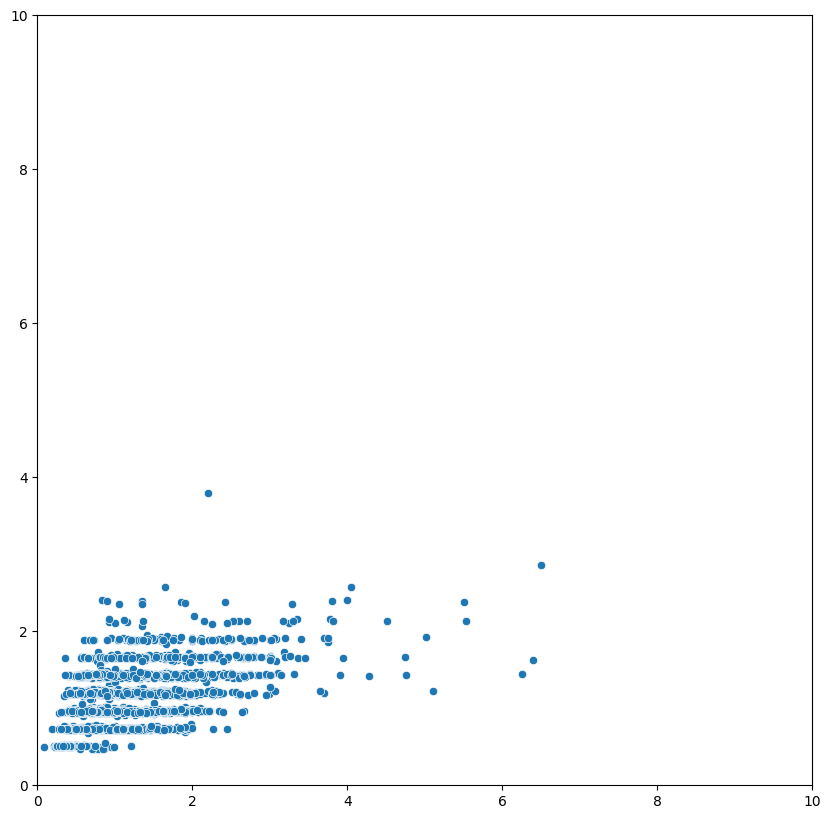

In [16]:
# Visualizando os pontos previstos versus real
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values/1000000, y=y_regressao/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

In [17]:
# Avaliando o modelo
# Avaliando o Erro quadrático médio
from sklearn.metrics import mean_squared_error
erro_quadratico_regressao = mean_squared_error(y_teste,y_regressao)
print(erro_quadratico_regressao)


269800933787.52127


In [18]:
# Avaliando o R Quadrado
from sklearn.metrics import r2_score
r2_regressao = r2_score(y_teste,y_regressao)
print(r2_regressao)
# Quanto mais próximo de 1, mais próximo dos valores reais

0.31563701604699745


# Criando outro modelo, com todas as colunas

In [19]:
base2 = base[["Price", "Rooms", "Bathroom", "Bedroom2", "Car", "Longtitude"
, "Lattitude", "Distance", "Landsize", "Postcode", "Propertycount"]]

In [20]:
base2 = base2.dropna(axis=0)
base2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13518 entries, 0 to 13579
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          13518 non-null  float64
 1   Rooms          13518 non-null  int64  
 2   Bathroom       13518 non-null  float64
 3   Bedroom2       13518 non-null  float64
 4   Car            13518 non-null  float64
 5   Longtitude     13518 non-null  float64
 6   Lattitude      13518 non-null  float64
 7   Distance       13518 non-null  float64
 8   Landsize       13518 non-null  float64
 9   Postcode       13518 non-null  float64
 10  Propertycount  13518 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.2 MB


In [21]:
Y = base2.Price
X = base2.drop('Price', axis=1)

In [22]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X,Y)

In [23]:
modelo_regressao2 = LinearRegression()

modelo_regressao2.fit(x_treino, y_treino)

LinearRegression()

In [24]:
y_regressao2 = modelo_regressao2.predict(x_teste)

In [25]:
erro_quadratico_regressao2 = mean_squared_error(y_teste, y_regressao2)
print(erro_quadratico_regressao2)

189602402280.6352


In [26]:
r2_regressao2 = r2_score(y_teste, y_regressao2)
print(r2_regressao2)
# Mais próximo de 1

0.48651292552228886


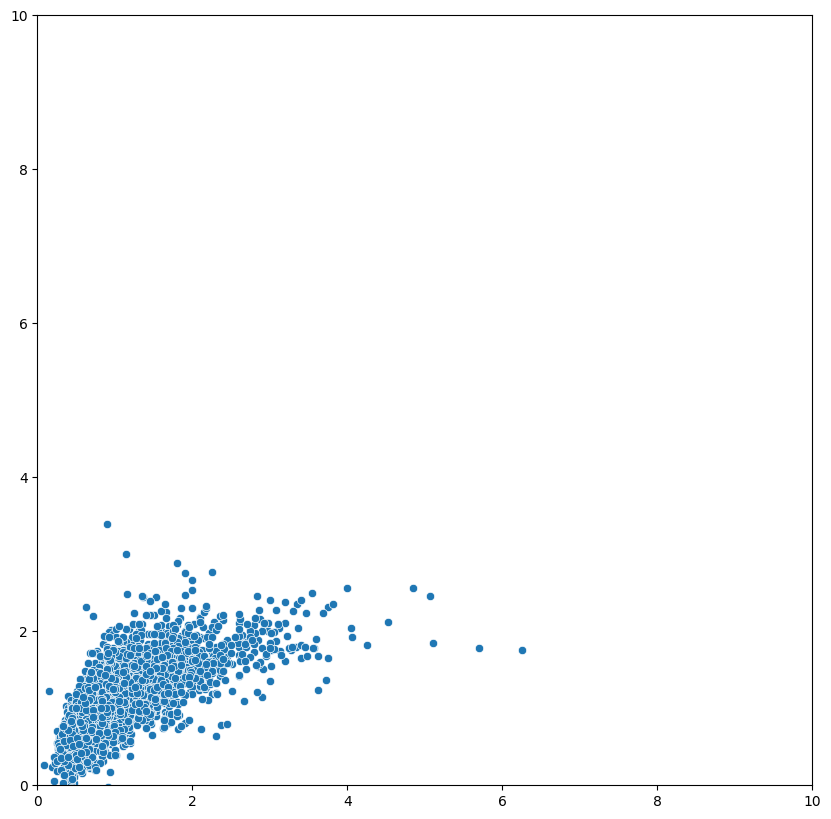

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_teste.values/1000000, y=y_regressao2/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

# Árvore de Decisão

In [28]:
# Importando o modelo
from sklearn.tree import DecisionTreeRegressor

# Instanciando
modelo_arvore_decisao = DecisionTreeRegressor()

# Realizando o fit do modelo
modelo_arvore_decisao.fit(x_treino,y_treino)

# Usando o modelo para prever os dados de teste
y_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

In [29]:
# Avaliando os erros
# Erro quadrático médio
erro_quadratico_arvore_decisao = mean_squared_error(y_teste,y_arvore_decisao)
print(erro_quadratico_arvore_decisao)

r2_arvore_decisao = r2_score(y_teste,y_arvore_decisao)
print(r2_arvore_decisao)

158796692180.2389
0.5699418998727713


# Resumo dos Resultados

In [30]:
print("Regressão Linear: " + str(round(erro_quadratico_regressao, 2)))
print("Erro Quadrático Médio:")
print(f'"R quadrado: {r2_regressao}"')

print("Regressão Linear: outro modelo")
print("Erro Quadrático Médio:")
print("R quadrado:")

print("Árvore de Decisão:")
print("Erro Quadrático Médio:")
print("R quadrado:")

Regressão Linear: 269800933787.52
Erro Quadrático Médio:
"R quadrado: 0.31563701604699745"
Regressão Linear: outro modelo
Erro Quadrático Médio:
R quadrado:
Árvore de Decisão:
Erro Quadrático Médio:
R quadrado:
